In [1]:
#Loading libraries
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import xgboost as xgb 
from xgboost import XGBClassifier 

import sklearn.metrics as skm

from sklearn.ensemble import ExtraTreesClassifier


In [2]:
#Read data
df = pd.read_excel("s3://sagemaker-studio-nyirsda8xuh/data.xls", header=1)

print(df.head())

   ID  LIMIT_BAL     SEX   EDUCATION MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0   1      20000  female  university  married   24      2      2     -1   
1   2     120000  female  university   single   26     -1      2      0   
2   3      90000  female  university   single   34      0      0      0   
3   4      50000  female  university  married   37      0      0      0   
4   5      50000    male  university  married   57     -1      0     -1   

   PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -1  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   
3      0  ...      28314      28959      29547      2000      2019      1200   
4      0  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0     

In [3]:
#Drop the ID column
df=df.drop(columns=['ID'])

In [4]:
#Read and print counts
cases = len(df)
nonfraud_len = len(np.where(df["default payment next month"] == 0)[0])
fraud_len = len(np.where(df["default payment next month"] == 1)[0])
fraud_percentage = fraud_len/nonfraud_len*100

print('Total number of cases are:', cases)
print('Non-fraud count:', nonfraud_len)
print('fraud count:', fraud_len)
print('Percentage of fraud: %', "{:.2f}".format(fraud_percentage))

Total number of cases are: 30000
Non-fraud count: 23364
fraud count: 6636
Percentage of fraud: % 28.40


In [5]:
#statistics
df.describe()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.518833,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,9.528019,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,267.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


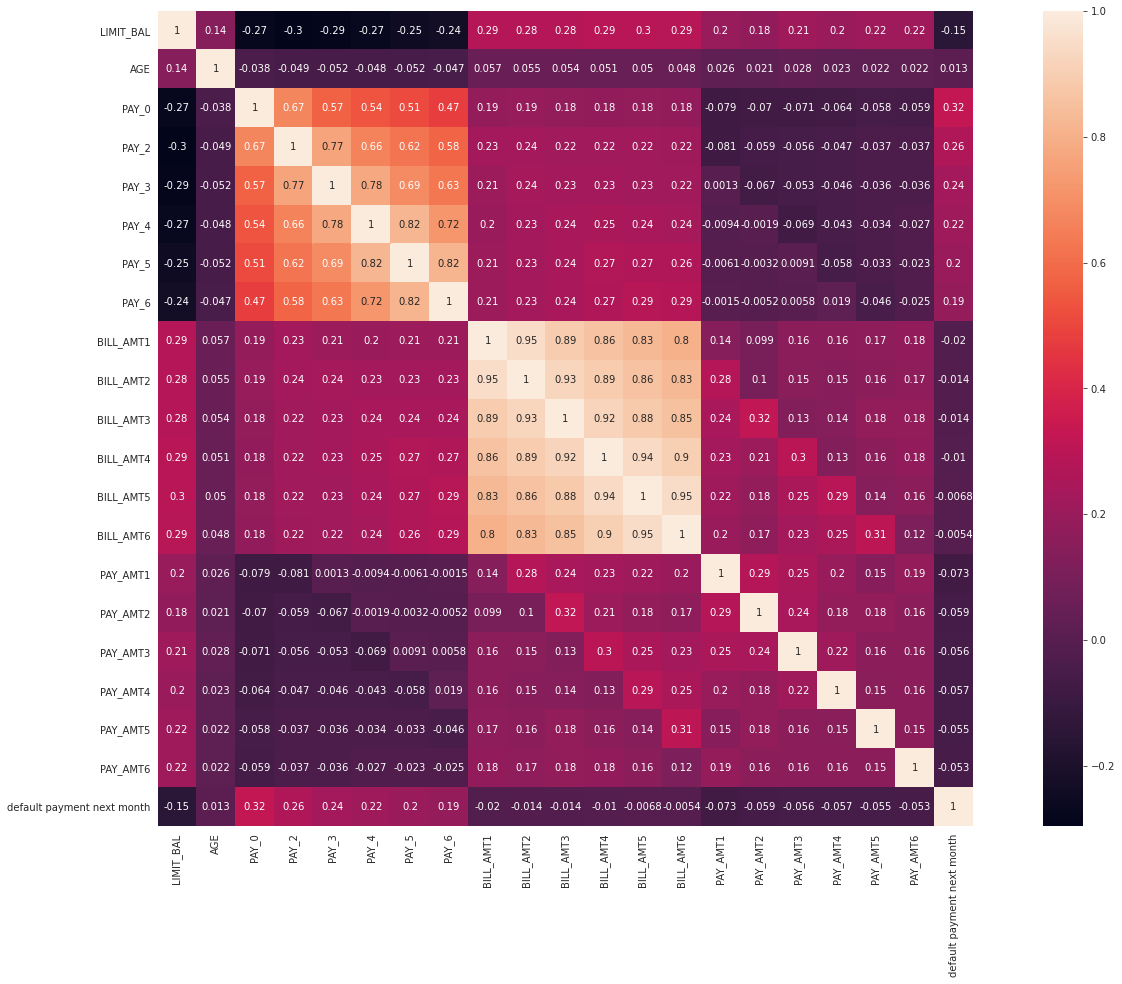

In [6]:
#Correlation heatmap
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(25, 15))
    sns.heatmap(df.corr(), annot=True, square=True)

In [7]:
#Encode the sex column
le = LabelEncoder()
df['SEX'] =le.fit_transform (df['SEX'])

In [8]:
#list unique categories of marriage and education columns
print(df.MARRIAGE.unique())
print(df.EDUCATION.unique())

['married' 'single' nan 0]
['university' 'graduate school' 'others' 'high school' nan 0]


In [9]:
#count the na rows in marriage and education columns
print(pd.isna(df["MARRIAGE"]).sum())
print(pd.isna(df["EDUCATION"]).sum())

323
331


In [10]:
#counts of each category in marriage column - to understand the total of rows with the value 0
df.groupby(['MARRIAGE']).size()

MARRIAGE
0             54
married    13659
single     15964
dtype: int64

In [11]:
#counts of each category in education column - to understand the total of rows with the value 0
df.groupby(['EDUCATION']).size()

EDUCATION
0                     14
graduate school    10585
high school         4916
others               124
university         14030
dtype: int64

In [12]:
#Drop rows with NA in education and marriage columns, then print the count of rows with NA as a double check
df=df.dropna(subset=['EDUCATION', 'MARRIAGE'])
print(pd.isna(df["MARRIAGE"]).sum())
print(pd.isna(df["EDUCATION"]).sum())

0
0


In [13]:
#Drop rows that has the category value as 0 in the columns education and marriage
df = df[df.EDUCATION != 0]
df = df[df.MARRIAGE != 0]
len(df)

29283

In [14]:
#Encode education and marriage columns
df['EDUCATION'] =le.fit_transform (df['EDUCATION'])
df['MARRIAGE'] =le.fit_transform (df['MARRIAGE'])

In [15]:
print(df.head())

   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      20000    0          3         0   24      2      2     -1     -1   
1     120000    0          3         1   26     -1      2      0      0   
2      90000    0          3         1   34      0      0      0      0   
3      50000    0          3         0   37      0      0      0      0   
4      50000    1          3         0   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   
3      0  ...      28314      28959      29547      2000      2019      1200   
4      0  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0     

In [16]:
#Scaling all columns to values from -1 to 1
sc = StandardScaler()

cols=list(df.columns)
cols.remove('default payment next month')

for x in cols:
    temp= df[x].values
    df[x] = sc.fit_transform(temp.reshape(-1, 1))

In [17]:
#look at some rows after scaling
print(df.head())

   LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0     PAY_2  \
0  -1.140404 -0.810862   1.019943 -1.082965 -1.202289  1.791660  1.776298   
1  -0.371481 -0.810862   1.019943  0.923391 -0.991697 -0.873306  1.776298   
2  -0.602158 -0.810862   1.019943  0.923391 -0.149330  0.015016  0.110501   
3  -0.909727 -0.810862   1.019943 -1.082965  0.166558  0.015016  0.110501   
4  -0.909727  1.233256   1.019943 -1.082965  2.272476 -0.873306  0.110501   

      PAY_3     PAY_4     PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
0 -0.695372 -0.665063 -1.525641  ...  -0.672001  -0.663283  -0.653315   
1  0.137896  0.188058  0.233335  ...  -0.621168  -0.606511  -0.598649   
2  0.137896  0.188058  0.233335  ...  -0.449360  -0.417663  -0.392657   
3  0.137896  0.188058  0.233335  ...  -0.232126  -0.187440  -0.158000   
4 -0.695372  0.188058  0.233335  ...  -0.346685  -0.348683  -0.332610   

   PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0 -0.355946 -0.234819 -0.307694 -

In [18]:
#Feature selection using ExtraTreesClassifier

X = df.iloc[:,0:23]
Y = df.iloc[:,23:24]
model = ExtraTreesClassifier()
model.fit(X, Y)
imp=model.feature_importances_


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [19]:
cols=X.columns
scores = pd.DataFrame({'Feature':cols, 'Score':imp})

In [20]:
#print features and scores, sorted with highest score on top
scores.sort_values(by=['Score'], ascending=False)

,Feature,Score
5,PAY_0,0.102939
4,AGE,0.068420
0,LIMIT_BAL,0.067006
6,PAY_2,0.052656
11,BILL_AMT1,0.050699
12,BILL_AMT2,0.047458
22,PAY_AMT6,0.046716
13,BILL_AMT3,0.045988
14,BILL_AMT4,0.045128
16,BILL_AMT6,0.045094


# Model - XGBoost

In [21]:
#DATA SPLIT

x = df[['PAY_0',  'LIMIT_BAL', 'PAY_2', 'BILL_AMT1', 'BILL_AMT2', 'PAY_AMT6', 
        'BILL_AMT3', 'PAY_AMT1',  'BILL_AMT6', 'PAY_AMT5', 'PAY_AMT2', 'PAY_AMT3', 
        'PAY_AMT4', 'PAY_5', 'PAY_3', 'PAY_4', 'EDUCATION', 'SEX']]
y = df['default payment next month'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


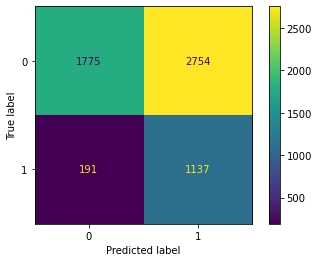

In [22]:
#model 1
xgb = XGBClassifier(max_depth = 10, objective='binary:logistic', booster="gbtree", 
                    learning_rate=5, verbosity=0, gamma=0.2, use_label_encoder=False)

xgb.fit(x_train, y_train)

#prediction
xgb_pred = xgb.predict(x_test)

#Confusion plot
skm.plot_confusion_matrix(xgb, x_test, y_test)

In [23]:
#performance
acc=skm.accuracy_score(y_test, xgb_pred)
f1=skm.f1_score(y_test, xgb_pred)
prec=skm.precision_score(y_test, xgb_pred)
rec=skm.recall_score(y_test, xgb_pred)

print('Accuracy score:', acc)
print('Precision score:', prec)
print('Recall score:', rec)
print('F1 score:', f1)

Accuracy score: 0.4971828581184907
Precision score: 0.29221279876638395
Recall score: 0.8561746987951807
F1 score: 0.43571565433991183


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


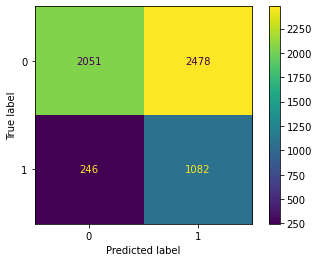

In [24]:
#model 2
xgb = XGBClassifier(objective='binary:logistic', booster='gbtree', gamma=0.2, learning_rate=5, max_depth=10, 
                    n_jobs=1, nthread=1, num_parallel_tree=1, subsample=0.8, verbosity=0)

xgb.fit(x_train, y_train)

#prediction
xgb_pred = xgb.predict(x_test)

#Confusion plot
skm.plot_confusion_matrix(xgb, x_test, y_test)

In [25]:
#performance
acc=skm.accuracy_score(y_test, xgb_pred)
f1=skm.f1_score(y_test, xgb_pred)
prec=skm.precision_score(y_test, xgb_pred)
rec=skm.recall_score(y_test, xgb_pred)

print('Accuracy score:', acc)
print('Precision score:', prec)
print('Recall score:', rec)
print('F1 score:', f1)

Accuracy score: 0.5349154857435547
Precision score: 0.3039325842696629
Recall score: 0.8147590361445783
F1 score: 0.44271685761047463
